# Auto reload modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import econ_mod.econ_utils as econ
import pandas as pd
import numpy as np
import fs


In [3]:
MAIN_DIR = fs.open_fs("../../data/raw/Class01")
XLSX_DIR = MAIN_DIR.getsyspath("flores.xlsx")

df = pd.read_excel(XLSX_DIR, index_col=0)
df

,flores,producción
observación,,
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
4,1.15,3.09
5,1.20,2.21
6,1.30,2.26
7,1.37,2.40
8,1.37,2.10
9,1.43,1.96


In [9]:
df_cop = econ.create_cop_df(df=df, x="flores", y="producción")
df_cop.head(5)

,flores,producción,x_bar,y_bar,x-x_bar,y-y_bar,num_b1,den_b1
observación,,,,,,,,
1,1.00,1.71,1.523,2.162,-0.523,-0.452,0.236396,0.273529
2,1.08,1.52,1.523,2.162,-0.443,-0.642,0.284406,0.196249
3,1.15,1.29,1.523,2.162,-0.373,-0.872,0.325256,0.139129
4,1.15,3.09,1.523,2.162,-0.373,0.928,-0.346144,0.139129
5,1.20,2.21,1.523,2.162,-0.323,0.048,-0.015504,0.104329


In [11]:
b1, b0 = econ.get_lr_metrics(df_cop=df_cop, x="flores", y="producción")
print(f"El coeficiente b1 = slope = {b1:.3f}")
print(f"El coeficiente b0 = intercept = {b0:.3f}")

El coeficiente b1 = slope = 0.516
El coeficiente b0 = intercept = 1.376


In [15]:
df_res = econ.create_res_df(df=df, slope=b1, intercept=b0, x="flores", y="producción")
df_res.head(5)

,flores,producción,y_hat,err_hat,err_bar
observación,,,,,
1,1.00,1.71,1.891965,-0.181965,-0.452
2,1.08,1.52,1.933270,-0.413270,-0.642
3,1.15,1.29,1.969413,-0.679413,-0.872
4,1.15,3.09,1.969413,1.120587,0.928
5,1.20,2.21,1.995229,0.214771,0.048


In [12]:
df_res['err_hat'].sum()

3.1086244689504383e-15

Using libraries

In [19]:
model_1 = (
    smf.ols(
        formula='producción ~ flores',
        data=df_cop
    )
    .fit()
)

In [20]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.093  
Dependent Variable: producción       AIC:                27.0920
Date:               2024-08-13 19:33 BIC:                29.0835
No. Observations:   20               Log-Likelihood:     -11.546
Df Model:           1                F-statistic:        2.957  
Df Residuals:       18               Prob (F-statistic): 0.103  
R-squared:          0.141            Scale:              0.20640
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   1.3756     0.4684   2.9369   0.0088    0.3916   2.3597
flores      0.5163     0.3002   1.7197   0.1026   -0.1144   1.1471
----------------------------------------------------------------
Omnibus:               3.112       Durbin-Watson:          2.131
Prob(Omnibus):         0.211       Jarque-Bera (JB):       1.322
Skew:                  0.441       Prob(JB):               0.516
Kurtosis:              3.900       Condition No.:          10   
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Text(0.5, 1.0, 'Diagrama de dispersión con la recta del modelo ajustado')

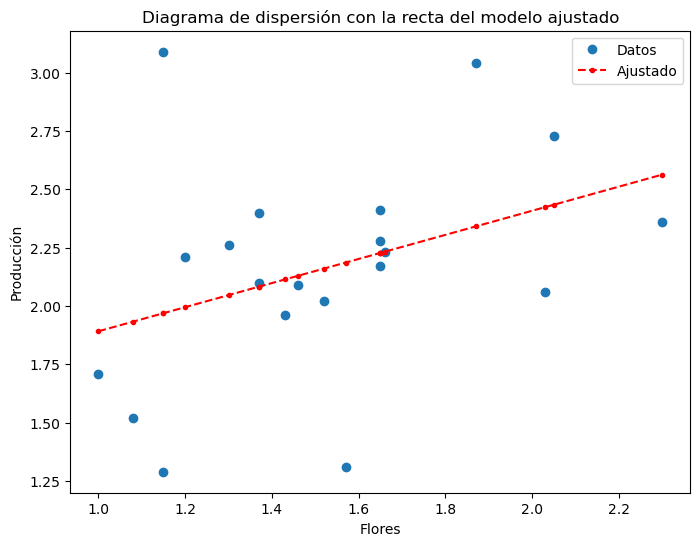

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df["flores"] , df["producción"] , 'o', label="Datos")
ax.plot(df["flores"], model_1.fittedvalues, 'r--.', label="Ajustado")
legend = ax.legend(loc="best")
plt.xlabel('Flores')
plt.ylabel('Producción')
plt.title('Diagrama de dispersión con la recta del modelo ajustado')